In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.set_option('display.max_columns', 50)

In [10]:
df = pd.read_csv(r'src/Weekly_Pizza_Sales.csv')
df

,week_number,pizza_name,pizza_size,quantity,year,month,day,unit_price,pizza_category
0,1,The Barbecue Chicken Pizza,L,18,2015,1,5,20.75,Chicken
1,1,The Barbecue Chicken Pizza,M,15,2015,1,5,16.75,Chicken
2,1,The Barbecue Chicken Pizza,S,5,2015,1,5,12.75,Chicken
3,1,The Big Meat Pizza,S,21,2015,1,5,12.00,Classic
4,1,The Brie Carre Pizza,S,3,2015,1,5,23.65,Supreme
...,...,...,...,...,...,...,...,...,...
4748,53,The Thai Chicken Pizza,M,4,2016,1,4,16.75,Chicken
4749,53,The Thai Chicken Pizza,S,4,2016,1,4,12.75,Chicken
4750,53,The Vegetables + Vegetables Pizza,L,6,2016,1,4,20.25,Veggie
4751,53,The Vegetables + Vegetables Pizza,M,4,2016,1,4,16.00,Veggie


# Exploratory Data Analysis (EDA)

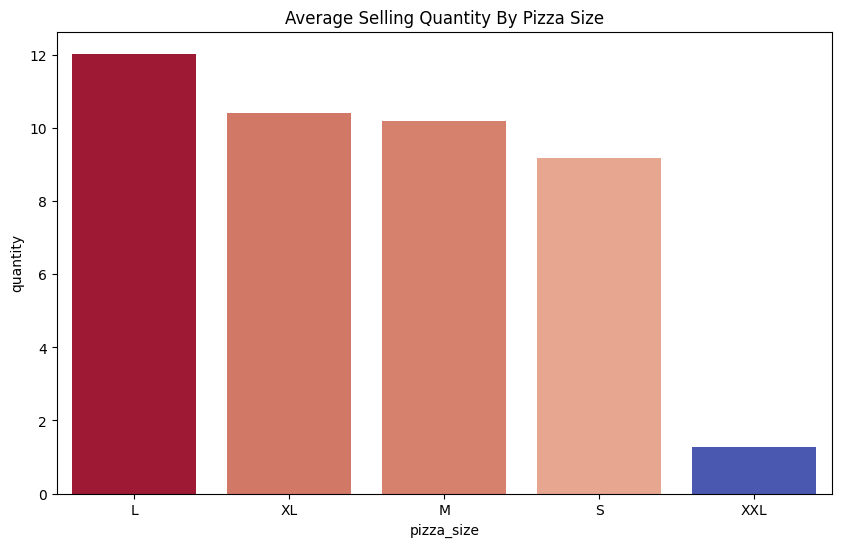

In [11]:
plot_df = df.groupby('pizza_size')['quantity'].mean().sort_values(ascending = False)
plt.figure(figsize = (10, 6))
# sns.barplot(df, x = 'pizza_size', y = 'selling_quantity')
sns.barplot( x = plot_df.index, y = plot_df, hue = plot_df, legend = False, palette = 'coolwarm')
plt.title('Average Selling Quantity By Pizza Size')
plt.show()

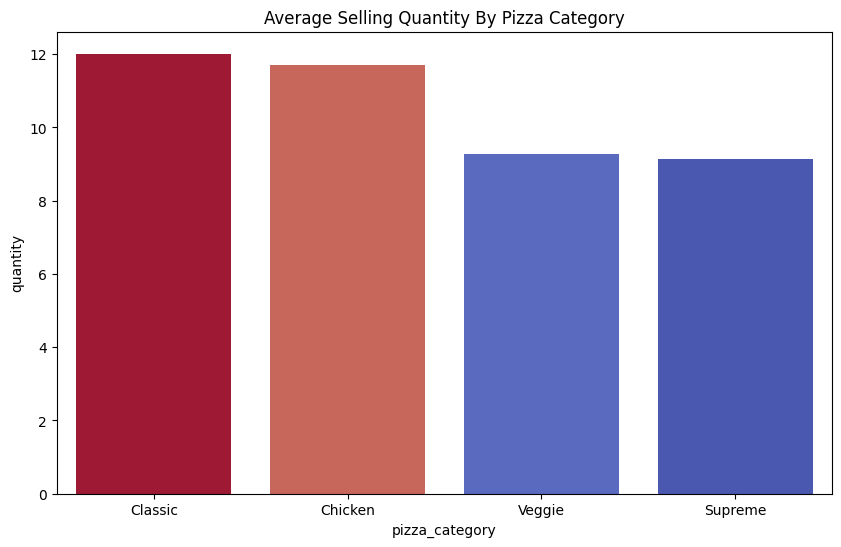

In [12]:
plot_df = df.groupby('pizza_category')['quantity'].mean().sort_values(ascending = False)
plt.figure(figsize = (10,6))
# sns.barplot(df, x = 'pizza_size', y = 'selling_quantity')
sns.barplot( x = plot_df.index, y = plot_df, hue = plot_df, legend = False, palette = 'coolwarm')
plt.title('Average Selling Quantity By Pizza Category')
plt.show()

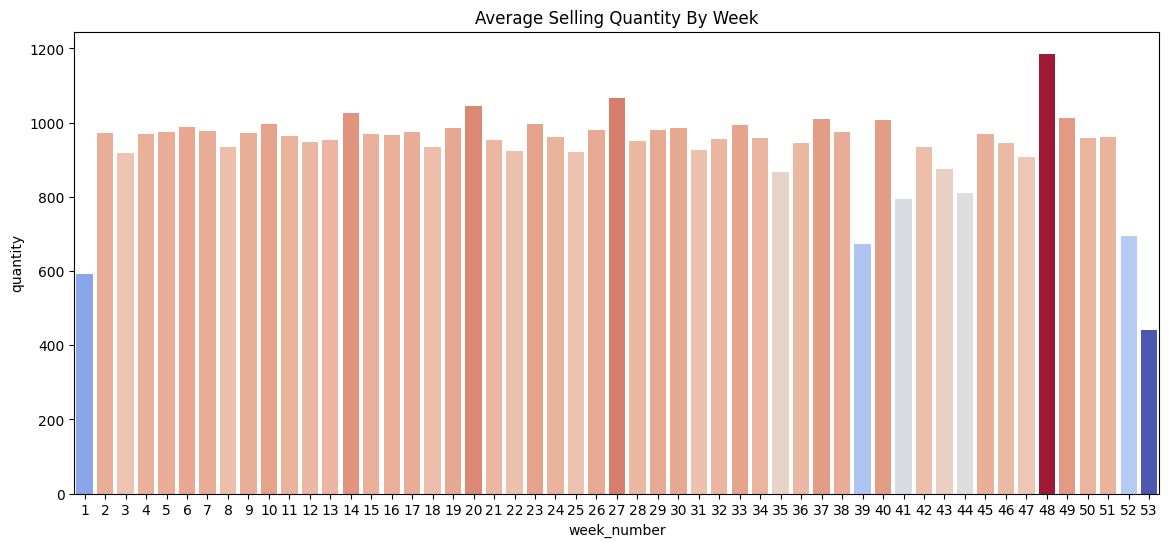

In [13]:
plot_df = df.groupby('week_number')['quantity'].sum().sort_values(ascending = False)
plt.figure(figsize = (14, 6))
# sns.barplot(df, x = 'pizza_size', y = 'selling_quantity')
sns.barplot( x = plot_df.index, y = plot_df, hue = plot_df, legend = False, palette = 'coolwarm')
plt.title('Average Selling Quantity By Week')
plt.show()



- Week 14: Easter Sunday (April 5)
- Week 20: Memorial Day (May 27, - observed on the last Monday of May)
- Week 27: Independence Day (July 4)
- Week 37: Labor Day (September 7,)
- Week 48: Thanksgiving Day (November 28,- observed on the fourth Thursday of November)

In [20]:
df['festival'] = np.where(df['week_number'] ==14, 'Easter Sunday',
                          np.where(df['week_number'] ==20, 'Memorial Day',
                                   np.where(df['week_number'] ==27, 'Independence Day',
                                            np.where(df['week_number'] ==37, 'Labor Day',
                                                     np.where(df['week_number'] ==48, 'Thanksgiving Day', 'No Festival')))))
# df.to_csv(r'src/Weekly_Pizza_Sales.csv', index = False)

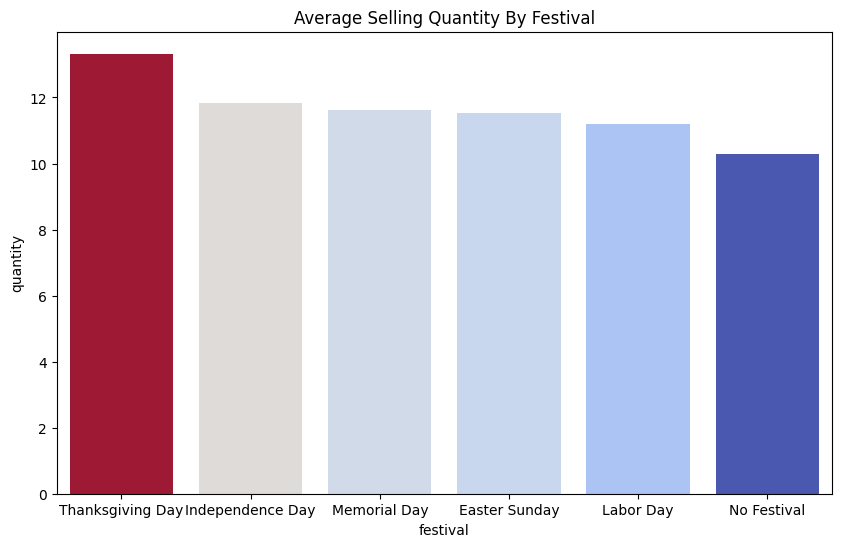

In [23]:
plot_df = df.groupby('festival')['quantity'].mean().sort_values(ascending = False)
plt.figure(figsize = (10, 6))
# sns.barplot(df, x = 'pizza_size', y = 'selling_quantity')
sns.barplot( x = plot_df.index, y = plot_df, hue = plot_df, legend = False, palette = 'coolwarm')
plt.title('Average Selling Quantity By Festival')
plt.show()

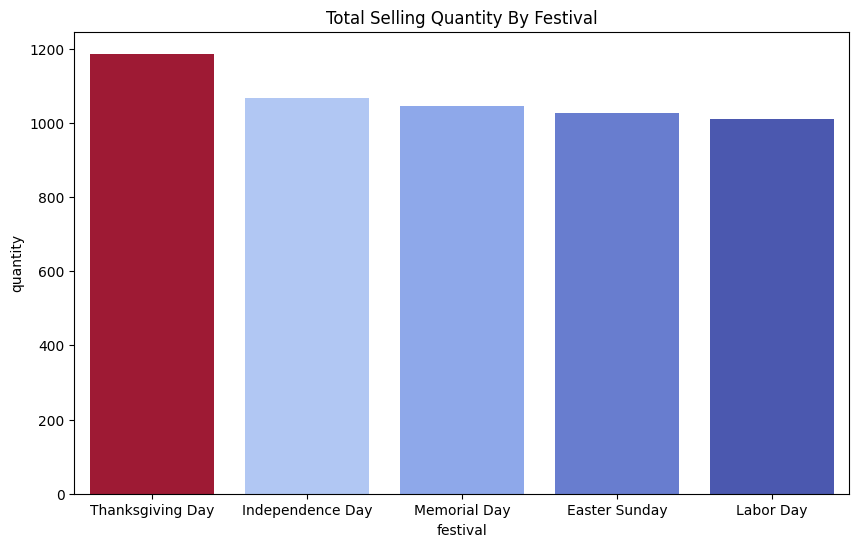

In [24]:
plot_df = df[df.festival!= 'No Festival'].groupby('festival')['quantity'].sum().sort_values(ascending = False)
plt.figure(figsize = (10, 6))
# sns.barplot(df, x = 'pizza_size', y = 'selling_quantity')
sns.barplot( x = plot_df.index, y = plot_df, hue = plot_df, legend = False, palette = 'coolwarm')
plt.title('Total Selling Quantity By Festival')
plt.show()

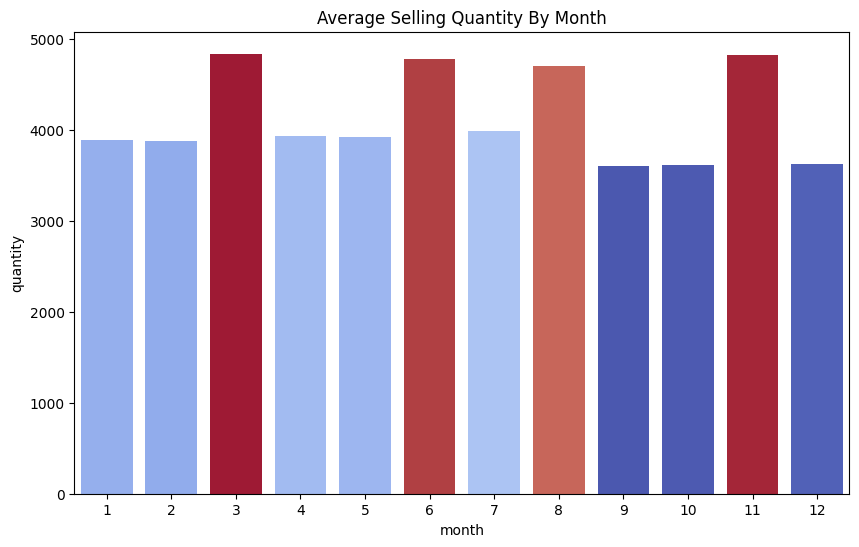

In [25]:
plot_df = df.groupby('month')['quantity'].sum().sort_values(ascending = False)
plt.figure(figsize = (10, 6))
sns.barplot( x = plot_df.index, y = plot_df, hue = plot_df, legend = False, palette = 'coolwarm')
plt.title('Average Selling Quantity By Month')
plt.show()

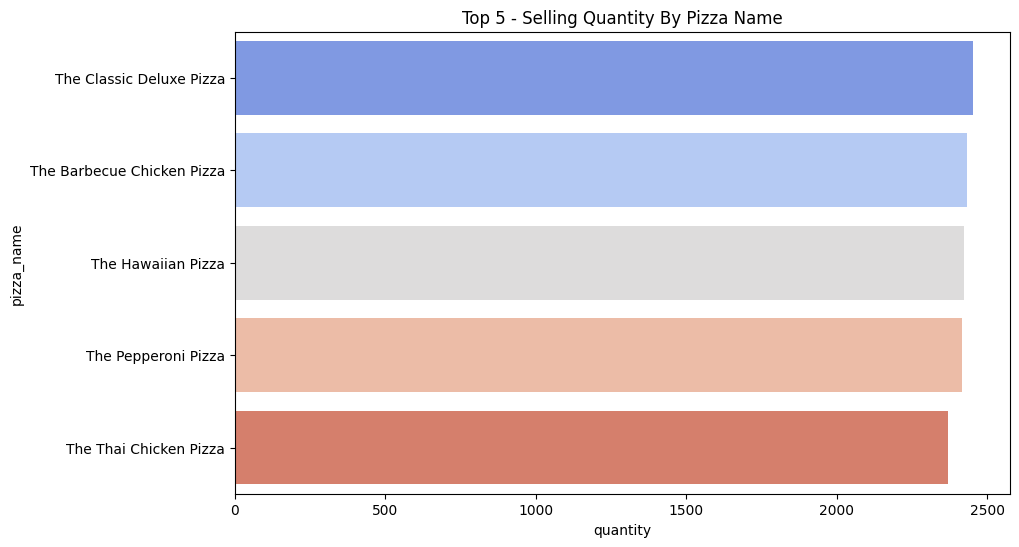

In [28]:
plot_df = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending = False).head()
plt.figure(figsize = (10, 6))
# sns.barplot(df, x = 'pizza_size', y = 'selling_quantity')
sns.barplot( x = plot_df, y = plot_df.index, hue = plot_df.index, legend = False, palette = 'coolwarm', orient = 'h')
plt.title('Top 5 - Selling Quantity By Pizza Name')
plt.show()